In [1]:
import os
import pickle
import warnings
import dateutil.parser as parser
import io

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def get_start_dates_tlg(root='Telegram data'):
    files = sorted(os.listdir(f'{root}'))[1:]
    for file in files:
        tmp = pd.read_json(f'{root}/{file}').iloc[-1, :]
        print(f'Канал {file[:-14]} начал работу {tmp["date"]}')

In [5]:
get_start_dates_tlg()

Канал DividendNews100 начал работу 2021-02-05 13:22:59+00:00
Канал FatCat18 начал работу 2018-07-16 19:45:56+00:00
Канал StockNews100 начал работу 2019-10-18 21:31:47+00:00
Канал banksta начал работу 2017-09-03 16:49:35+00:00
Канал cbonds начал работу 2017-07-28 07:13:26+00:00
Канал divForever начал работу 2018-03-17 18:10:31+00:00
Канал economika начал работу 2015-11-04 05:50:42+00:00
Канал economylive начал работу 2019-10-09 10:37:13+00:00
Канал gazprom начал работу 2020-05-08 15:23:41+00:00
Канал gazpromneft_official начал работу 2022-03-11 14:44:59+00:00
Канал investingcorp начал работу 2018-05-01 13:30:23+00:00
Канал markettwits начал работу 2017-11-09 08:38:22+00:00
Канал nedvizhna24 начал работу 2020-07-03 17:41:26+00:00
Канал smartlab начал работу 2021-03-29 10:25:19+00:00


In [6]:
def get_dates_tlg(root='Telegram data'):
    files = sorted(os.listdir(f'{root}'))[1:]
    dates = pd.Series()
    for file in files:
        tmp = pd.to_datetime(pd.read_json(f'{root}/{file}')['date']).dt.round('D')
        dates = pd.concat([dates, tmp], axis=0)
    
    return dates

In [7]:
dates_tg = get_dates_tlg()

/var/folders/m6/2n44mlkj7nbdwb651dd78pwc0000gn/T/ipykernel_4055/2098969010.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dates = pd.Series()


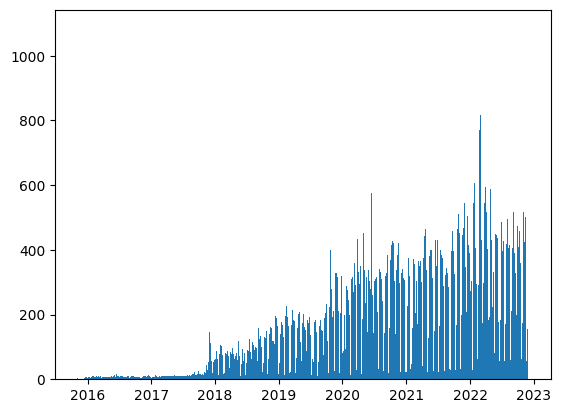

In [16]:
plt.hist(dates_tg, bins=len(np.unique(dates_tg)));

In [4]:
def dates_news(file_path):
    try:
        warnings.simplefilter('ignore')
        df = pd.DataFrame(pd.read_pickle(f'ria_economy/raw_cites/{file_path}'))
        df['tp'] = df['data_or_ex'].map(lambda x: isinstance(x, tuple))
        df.drop(df[df.tp != True].index, inplace=True)
        df[['date', 'title', 'announce', 'text']] = pd.DataFrame(df['data_or_ex'].tolist(), index=df.index)
        df = df['date'].str.replace('.', '-')
        df = pd.to_datetime(df.map(lambda x: x[6:]), errors='coerce', format='%d-%m-%Y')
        warnings.simplefilter('default') 
        return df
    except Exception as ex:
        print(ex)
        return None

In [5]:
files = sorted(os.listdir('ria_economy/raw_cites'))[1:]
agg_dates = pd.Series()
for file in files:
    tmp = dates_news(f'{file}')
    if tmp is None:
        continue 
    agg_dates = pd.concat([agg_dates, tmp], axis=0)

/var/folders/m6/2n44mlkj7nbdwb651dd78pwc0000gn/T/ipykernel_858/539735130.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  agg_dates = pd.Series()


(1, 3)
(1, 3)
(200, 3)
(199, 3)
(199, 3)
(199, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(201, 3)
(201, 3)
(199, 3)
(197, 3)
(200, 3)
(199, 3)
(201, 3)
(201, 3)
(199, 3)
(199, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(201, 3)
(201, 3)
(198, 3)
(198, 3)
(199, 3)
(199, 3)
(202, 3)
(202, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(201, 3)
(201, 3)
(199, 3)
(199, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(199, 3)
(199, 3)
(201, 3)
(201, 3)
(200, 3)
(200, 3)
(199, 3)
(199, 3)
(201, 3)
(201, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(200, 3)
(201, 3)
(201, 3)
(199, 3)
(199, 3)
(199, 3)
(199, 3)
(200, 3)
(200, 3)
(201, 3)
(201, 3)
(199, 3)
(199, 3)
(203, 3)
(203, 3)
(198, 3)
(198,

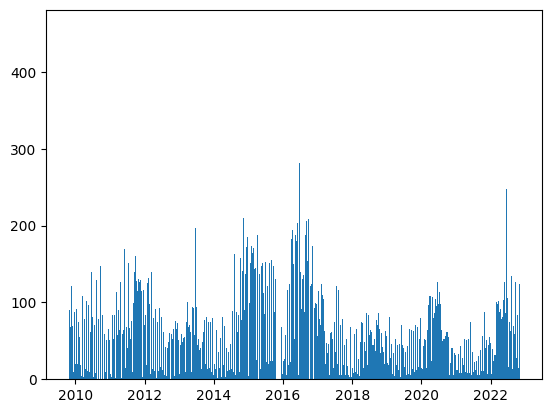

In [6]:
plt.hist(agg_dates, bins=len(np.unique(agg_dates)));

In [23]:
np.unique(agg_dates)[2150:2190]

array(['2015-10-11T00:00:00.000000000', '2015-10-12T00:00:00.000000000',
       '2015-10-13T00:00:00.000000000', '2015-10-14T00:00:00.000000000',
       '2015-10-15T00:00:00.000000000', '2015-12-07T00:00:00.000000000',
       '2015-12-08T00:00:00.000000000', '2015-12-09T00:00:00.000000000',
       '2015-12-10T00:00:00.000000000', '2015-12-11T00:00:00.000000000',
       '2015-12-12T00:00:00.000000000', '2015-12-13T00:00:00.000000000',
       '2015-12-14T00:00:00.000000000', '2015-12-15T00:00:00.000000000',
       '2015-12-16T00:00:00.000000000', '2015-12-17T00:00:00.000000000',
       '2015-12-18T00:00:00.000000000', '2015-12-19T00:00:00.000000000',
       '2015-12-20T00:00:00.000000000', '2015-12-21T00:00:00.000000000',
       '2015-12-22T00:00:00.000000000', '2015-12-23T00:00:00.000000000',
       '2015-12-24T00:00:00.000000000', '2015-12-25T00:00:00.000000000',
       '2015-12-26T00:00:00.000000000', '2015-12-27T00:00:00.000000000',
       '2015-12-28T00:00:00.000000000', '2015-12-29